In [3]:
import pandas as pd

offers = pd.read_csv(r'path_to\file.csv')
orders = pd.read_csv(r'path_to\file.csv')

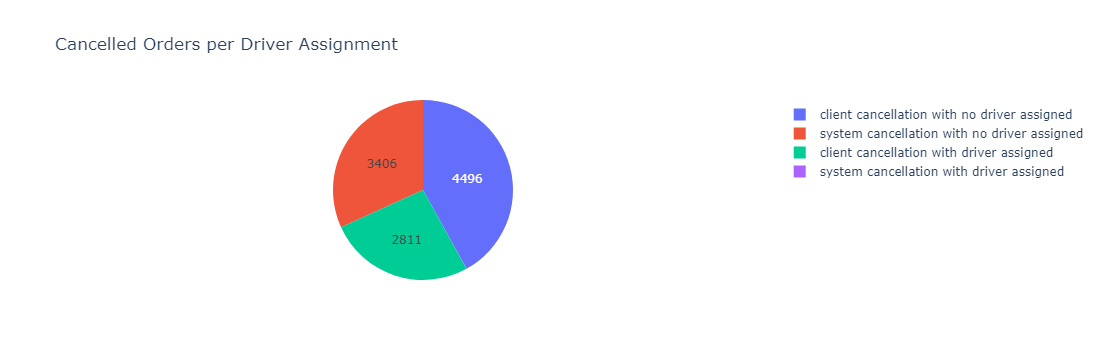

,order_status_key,is_driver_assigned_key,order_count
0,client cancellation,no driver assigned,4496
1,client cancellation,driver assigned,2811
2,system cancellation,no driver assigned,3406
3,system cancellation,driver assigned,3


In [14]:
# cancelled orders
import plotly.express as px

data = orders.groupby(['order_status_key', 'is_driver_assigned_key'])['order_gk'].count().reset_index().rename(columns = {'order_gk':'order_count'})
data = data.replace(4, 'client cancellation')
data = data.replace(9, 'system cancellation')
data = data.replace(0, 'no driver assigned')
data = data.replace(1, 'driver assigned')

labels = data['order_status_key'] + ' with ' + data['is_driver_assigned_key']
values = data['order_count']
fig = px.pie(names = labels,
            values = values,
            title = 'Cancelled Orders per Driver Assignment')
fig.update_traces(textinfo = 'value',
                 textposition = 'inside')
fig.show()

data

C:\Users\goonb\AppData\Local\Temp\ipykernel_5532\2673989029.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



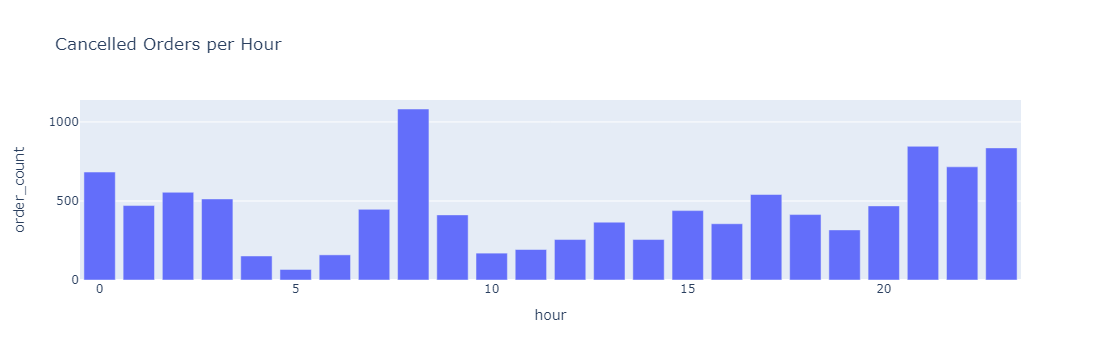

,hour,order_count
0,0,683
1,1,471
2,2,555
3,3,513
4,4,152
5,5,67
6,6,159
7,7,447
8,8,1082
9,9,412


In [8]:
# cancelled orders per hour
orders['order_datetime'] = pd.to_datetime(orders['order_datetime'])
orders['hour'] = orders['order_datetime'].dt.hour
per_hour = orders.groupby('hour')['order_gk'].count().reset_index().rename(columns = {'order_gk':'order_count'})

fig = px.line(per_hour,
             x = 'hour',
             y = 'order_count',
             title = 'Cancelled Orders per Hour')
fig.show()
per_hour

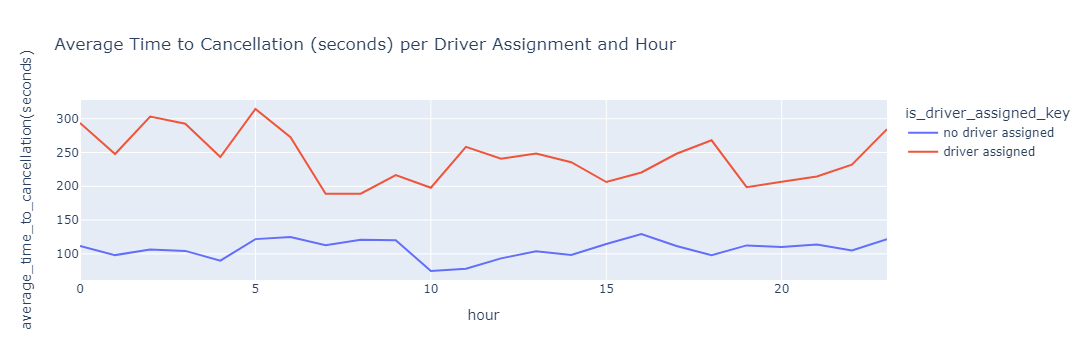

,is_driver_assigned_key,hour,average_time_to_cancellation(seconds)
0,no driver assigned,0,111.56
1,no driver assigned,1,98.13
2,no driver assigned,2,106.44
3,no driver assigned,3,104.36
4,no driver assigned,4,90.00
5,no driver assigned,5,121.80
6,no driver assigned,6,124.96
7,no driver assigned,7,112.63
8,no driver assigned,8,120.70
9,no driver assigned,9,120.00


In [16]:
#Average time to Cancellation by the hour
data = orders[['is_driver_assigned_key', 'hour', 'cancellations_time_in_seconds']]
data = data.groupby(['is_driver_assigned_key', 'hour']).mean('cancellations_time_in_seconds').reset_index().rename(columns = {'cancellations_time_in_seconds':'average_time_to_cancellation(seconds)'})
data['is_driver_assigned_key'] = data['is_driver_assigned_key'].replace(0, 'no driver assigned')
data['is_driver_assigned_key'] = data['is_driver_assigned_key'].replace(1, 'driver assigned')
data['average_time_to_cancellation(seconds)'] = data['average_time_to_cancellation(seconds)'].round(2)
data

fig = px.line(data,
             x = 'hour',
             y = 'average_time_to_cancellation(seconds)',
             color = 'is_driver_assigned_key',
             title = 'Average Time to Cancellation (seconds) per Driver Assignment and Hour')
fig.show()
data

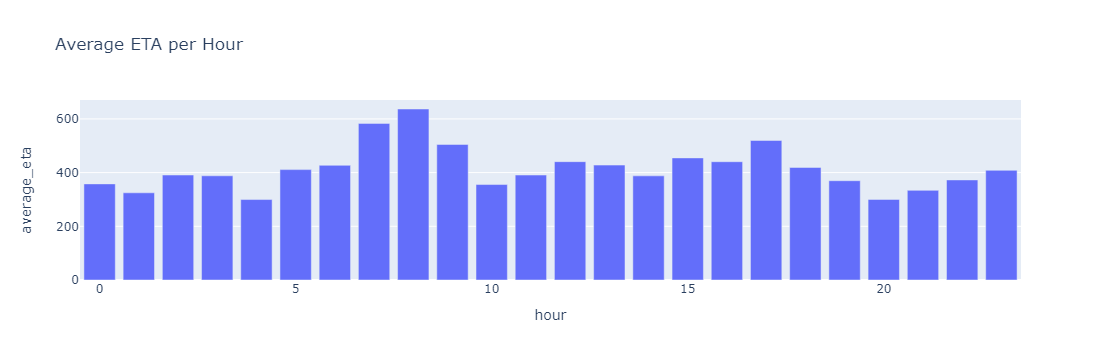

,hour,average_eta
0,0,357.96
1,1,324.75
2,2,391.01
3,3,388.09
4,4,299.66
5,5,411.12
6,6,427.15
7,7,583.36
8,8,636.91
9,9,504.89


In [17]:
# average eta per hour

avg_eta = orders.groupby('hour')['m_order_eta'].mean().reset_index().rename(columns = {'m_order_eta':'average_eta'})
avg_eta['average_eta'] = avg_eta['average_eta'].round(2)

fig = px.bar(avg_eta,
             x = 'hour',
             y = 'average_eta',
             title = 'Average ETA per Hour')

fig.show()
avg_eta